In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('crop_recommendation.csv')

In [3]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
data.shape

(2200, 8)

In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [15]:
crop_summary=pd.pivot_table(data,index=['label'],aggfunc='mean')

In [16]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [17]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Visual Analysis

In [18]:
import plotly.express as px

Boxplot

In [21]:
#checking and treating outliers in each column

fig =px.box(data,y='N',points='all',title="Boxplot of N")
fig.show()

In [25]:
fig= px.box(data, y="P",points="all",title="Boxplot of P")
# sns.boxplot(data["P"])
# plt.xticks(rotation=90)
fig.show()

In [27]:
fig= px.box(data, y="K",points="all",title="Boxplot of K")
fig.show()

In [28]:
fig= px.box(data, y="temperature",points="all",title="Boxplot of temperature")
fig.show()

In [29]:
fig= px.box(data, y="humidity",points="all",title="Boxplot of humidity")
fig.show()

In [30]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [31]:
fig= px.box(data, y="ph",points="all",title="Boxplot of ph")
fig.show()

In [32]:
fig= px.box(data, y="rainfall",points="all",title="Boxplot of rainfall")
fig.show()

Outliners

In [33]:
#you can detect outliners and remove them

df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()

'''Detection of Outliers'''
#IQR = Q3 - Q1
Q1=np.percentile(df_boston['rainfall'],25,interpolation='midpoint') # type: ignore
Q3=np.percentile(df_boston['rainfall'],75,interpolation='midpoint') # type: ignore
IQR=Q3-Q1

print("Old Shape: ", df_boston.shape)

# Upper bound
upper = np.where(df_boston['rainfall'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df_boston['rainfall'] <= (Q1-1.5*IQR))

'''Removing the Outliers'''
df_boston.drop(upper[0], inplace=True)
df_boston.drop(lower[0], inplace=True)


print("New Shape: ", df_boston.shape)

Old Shape:  (2200, 8)
New Shape:  (2101, 8)


In [34]:
data=df_boston

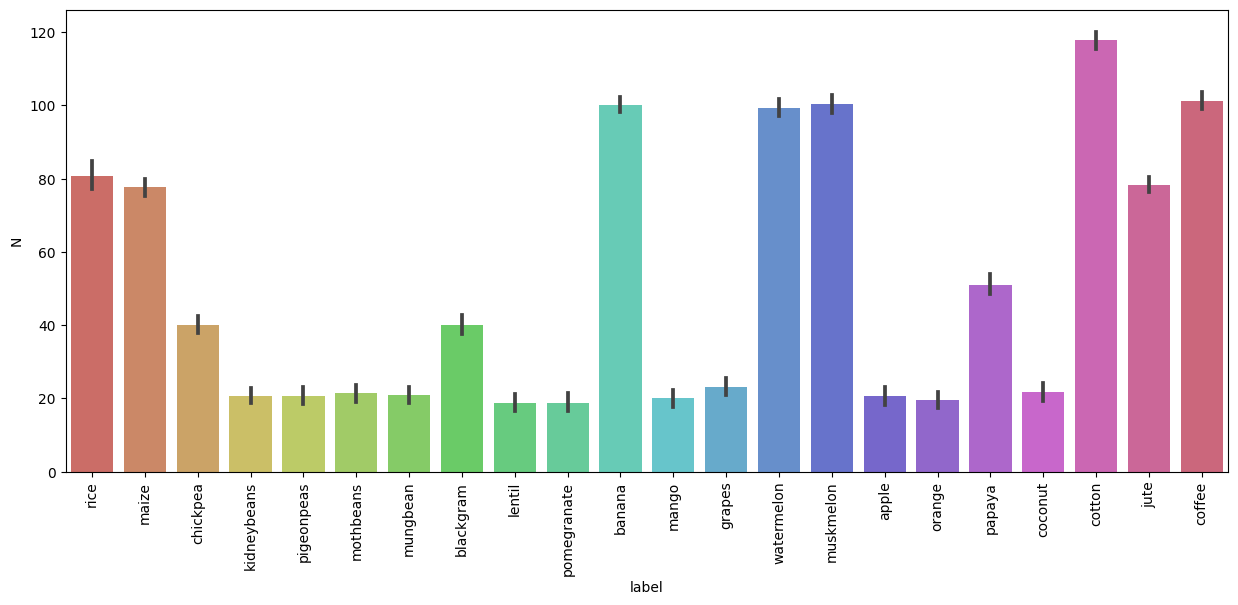

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [37]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
crop_summary_new=data.copy()

In [39]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [40]:
fig1=px.bar(crop_summary_new,x='label',y='N')
fig1.show()

In [41]:
fig1=px.bar(crop_summary_new,x='label',y='K')
fig1.show()

In [42]:
fig1=px.bar(crop_summary_new,x='label',y='P')
fig1.show()

Correlation

In [43]:
import random
from IPython.core.display import update_display

In [44]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237127,-0.139970,0.041633,0.189609,0.099238,0.003231
P,-0.237127,1.000000,0.737806,-0.133415,-0.111730,-0.146018,-0.046656
K,-0.139970,0.737806,1.000000,-0.165188,0.198119,-0.174559,-0.042466
temperature,0.041633,-0.133415,-0.165188,1.000000,0.203789,-0.021339,-0.039570
humidity,0.189609,-0.111730,0.198119,0.203789,1.000000,-0.005955,0.020846
ph,0.099238,-0.146018,-0.174559,-0.021339,-0.005955,1.000000,-0.127166
rainfall,0.003231,-0.046656,-0.042466,-0.039570,0.020846,-0.127166,1.000000


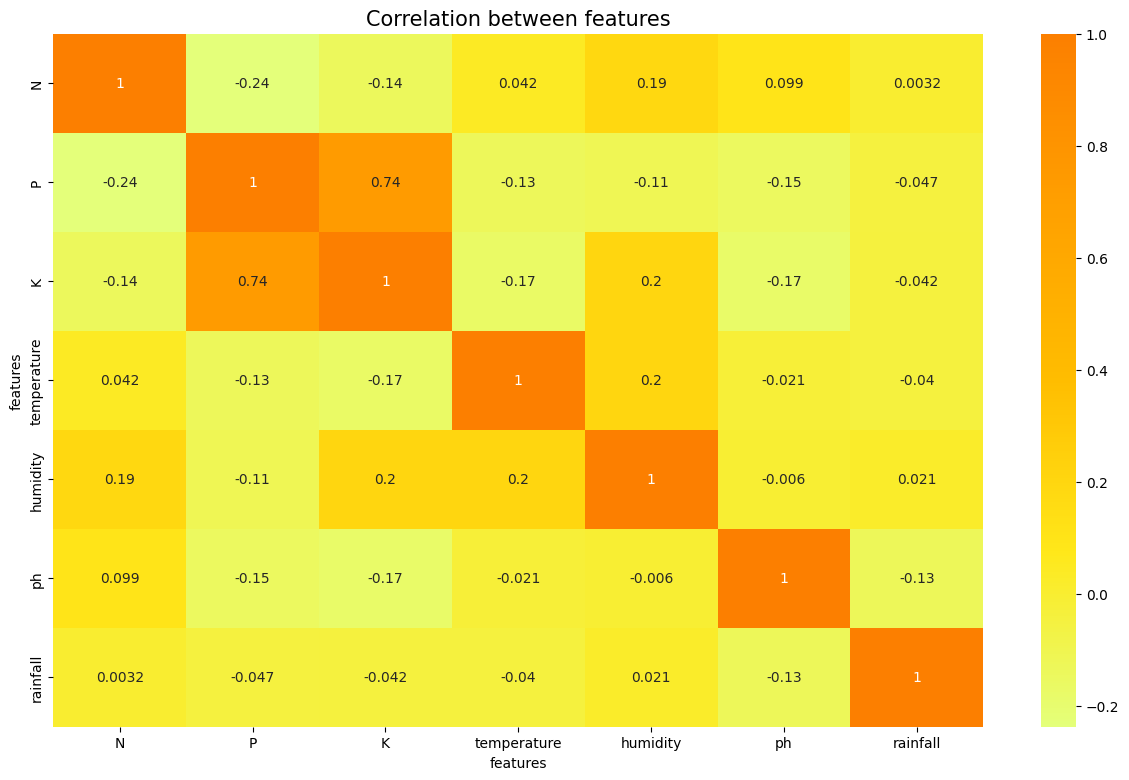

In [45]:
fig,ax=plt.subplots(1,1,figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between features',fontsize=15,c='black')
plt.show()

In [46]:
X=data.drop('label',axis=1)
y=data['label']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,shuffle=True,random_state=0)

In [ ]:
#apply logistic regression on the data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
# Predict Output
log_predicted= logreg.predict(X_test)
#accuracy score
logreg_score = round(accuracy_score(log_predicted,y_test)*100,2)
print('Accuracy score of logistic regression is: ',logreg_score)


#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
log_prob = logreg.predict_proba(X_test)

# keep probabilities for the positive outcome only
log_prob = log_prob[:, 1]

# calculate scores
log_auc = roc_auc_score(y_test, log_prob)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (log_auc))

# calculate roc curves
log_fpr, log_tpr, _ = roc_curve(y_test, log_prob)

# plot the roc curve for the model
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()


In [ ]:
#confusion matrix
logreg_cm = confusion_matrix(y_test,log_predicted)
print('Confusion matrix of logistic regression is: \n', logreg_cm)


In [ ]:

#classification report
logreg_cr = classification_report(y_test,log_predicted)
print('Classification report of logistic regression is: \n', logreg_cr)
